# Time series analysis (TSA)

import libraries

In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from statsmodels.tsa.stattools import adfuller 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA 

Loading and viewing data 

In [5]:
df=pd.read_csv(r"C:\Users\DELL\Downloads\my_python\DailyDelhiClimateTrain.csv")
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


set  date as index

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [7]:
#checking the null values in single row
print(df[df['date'].isna()])

Empty DataFrame
Columns: [date, meantemp, humidity, wind_speed, meanpressure]
Index: []


In [12]:
#convert object into data datype 
df['date']=pd.to_datetime(df['date'],errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1462 non-null   datetime64[ns]
 1   meantemp      1462 non-null   float64       
 2   humidity      1462 non-null   float64       
 3   wind_speed    1462 non-null   float64       
 4   meanpressure  1462 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 57.2 KB


In [13]:
#setting index
df.set_index("date",inplace=True)
df.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


Visualize

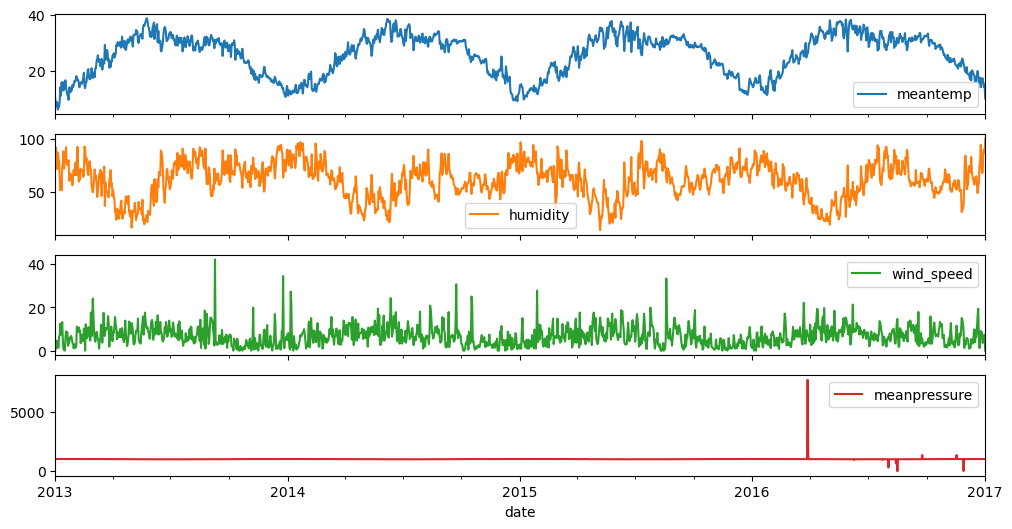

In [16]:
df.plot(figsize=(12,6),subplots =True)
plt.show()

CONCLUSION
1. meantemp :
   * every years starts with low temperature
   * the pattern of the temperature overthime is same
   * there is a high theparatur in mid of the year
2. humidity :
   * whenever the temperature is low in the year the humidity goes on high
   * whenever the temperature is high in the year the humidity goes on low
3. wind_speed :
   * there is a 3 spic in 2013-2014
   *  there is a 2 spic in 2014-2015
   *   there is a 1 spic in 2015-2016
4. meanpressure :
   * there is no observed value in the years 2013-2016
   * but there is a values that show pressure high in 2016-2017,may be it is error values

##### Stationarity :
A time series is stationary if its staticals properties ( mean , variance , autocorrelation ) reamin constant  over thime .

Hypothese of the ADF test :

1. null hypothesis (h0) : the time series has a unit root .
2. alternative hypothesis (h1) : the time series does not have a unit root

interpreting ADf test results : p-values in index-1
1. if p-values is less than 0.05 , reject h0 the series is stationary
2. if p-values is greater than 0.05 , fail to reject  h0 the series is non -stationary
* avg/mean, variance values are constant over the time
* null(n0)- non stationary , we can find it by using adfuller result ( [0]- null, [1]-alternate ), if p-values > 0.05 (NST) (not fit for arima)
* Alternate (n1) -statinary, if p-values < 0.05 (ST)

In [18]:
adf_r=adfuller(df['meantemp'])
print(adf_r)

(-2.0210690559206728, 0.27741213723016056, 10, 1451, {'1%': -3.4348647527922824, '5%': -2.863533960720434, '10%': -2.567831568508802}, 5423.895746470953)


In [21]:
if adf_r[1]< 0.05 : # p-values always at the index of [1]
    print("Stationary")
else :
    print("Non Stationary ")#not fit for arima 

Non Stationary 


# Differencing to remove trend :
    if the series is non - stationary , apply differencing .
( Differencing is a technique used to make a sttionary time series stitioary by removing trend/seasonality)

(convert the non stationary to stationary)

.diff used to find the difference values that make an error/jump

_____________________________________________________________________
temperature - [ 20,21,22,24,25,27,28,27] , by difference between the elements 

difference =[1,1,2,1,2,1,-1]

the new series row function arround [ 0-2]

In [22]:
df['meandiff']=df['meantemp'].diff()
df.head()

,meantemp,humidity,wind_speed,meanpressure,meandiff
date,,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667,NaN
2013-01-02,7.400000,92.000000,2.980000,1017.800000,-2.600000
2013-01-03,7.166667,87.000000,4.633333,1018.666667,-0.233333
2013-01-04,8.666667,71.333333,1.233333,1017.166667,1.500000
2013-01-05,6.000000,86.833333,3.700000,1016.500000,-2.666667


In [24]:
adf_r_dif=adfuller(df['meandiff'].dropna())
if adf_r_dif[1] >0.05:
    print("Non stationary")
else :
    print("stationary")

stationary


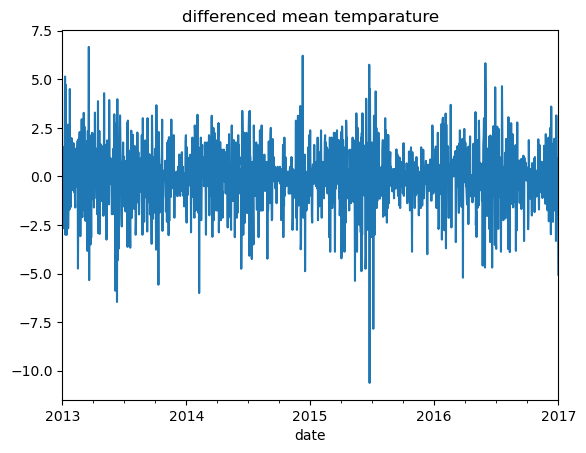

In [25]:
df["meandiff"].plot(title="differenced mean temparature")
plt.show()

* the data behaves as stationary
* average revolve around zero
* even after differencing there are some extreme weather changes 
* there may be a outlier (positive values) in 2014-2015
* by observing there is an negative spic , means low temperature in 2015 -2016 in mid of year

# decompositon -used to find the trends

seasonal decomposition is a technique used to break a time series into three main components
* trends - the long term pattern ( increase /decrease over the time)
* seasinality - the repeating patteren at fixed intervals (monthly sales spikes)
* residuals ( noise) - the random variation that are not explained by trends or seasonality

Interpreting tghe output :
* original seriea - the raw time series data
* trend components - the general directior of the data over time(increasing /decrease)
* seasonal component - the repeating patterns ( higher sales in december)monthly analysis
* residual component - the remaining part of after removing trend & seasonal

In [28]:
decom=seasonal_decompose(df['meantemp'],model='additive',period=365)
print(decom)

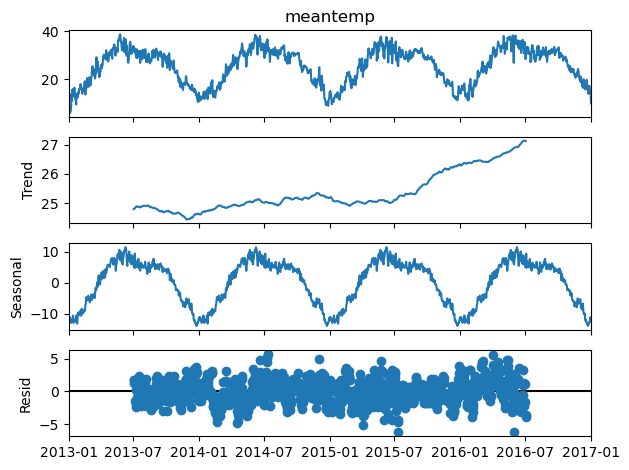

In [30]:
decom.plot()
plt.show()

* Trend : by observing trend there is a rapid increases  in the temperatue 26 - 27 from 2015-01 to 2016-07
* In seasonal : which maintaince the consistance of the temperature 
* In resid : There is an outlier between the 2016-01 to 2016-07

# ARIMA

In [64]:
#splitting data 
len(df)

1462

In [65]:
print(len(df)*0.8)

1169.6000000000001


In [69]:
train=df.iloc[0:1169]
test=df.iloc[1169:]

In [70]:
mymodel=ARIMA(train['meantemp'],order = (1,1,1))

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [71]:
mymodel=mymodel.fit()

In [72]:
forecast = mymodel.forecast(steps=len(test))
print(forecast.head())

2016-03-15    22.826205
2016-03-16    23.085687
2016-03-17    23.234913
2016-03-18    23.320731
2016-03-19    23.370084
Freq: D, Name: predicted_mean, dtype: float64


In [73]:

test['forecast']=forecast
test.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_5372\3008320720.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['forecast']=forecast


,meantemp,humidity,wind_speed,meanpressure,meandiff,forecast
date,,,,,,
2016-03-15,24.066667,58.933333,8.646667,1014.866667,1.691667,22.826205
2016-03-16,23.937500,53.750000,10.881250,1012.812500,-0.129167,23.085687
2016-03-17,26.312500,50.312500,6.843750,1010.437500,2.375000,23.234913
2016-03-18,26.187500,61.250000,6.712500,1009.812500,-0.125000,23.320731
2016-03-19,26.785714,61.857143,3.578571,1009.214286,0.598214,23.370084


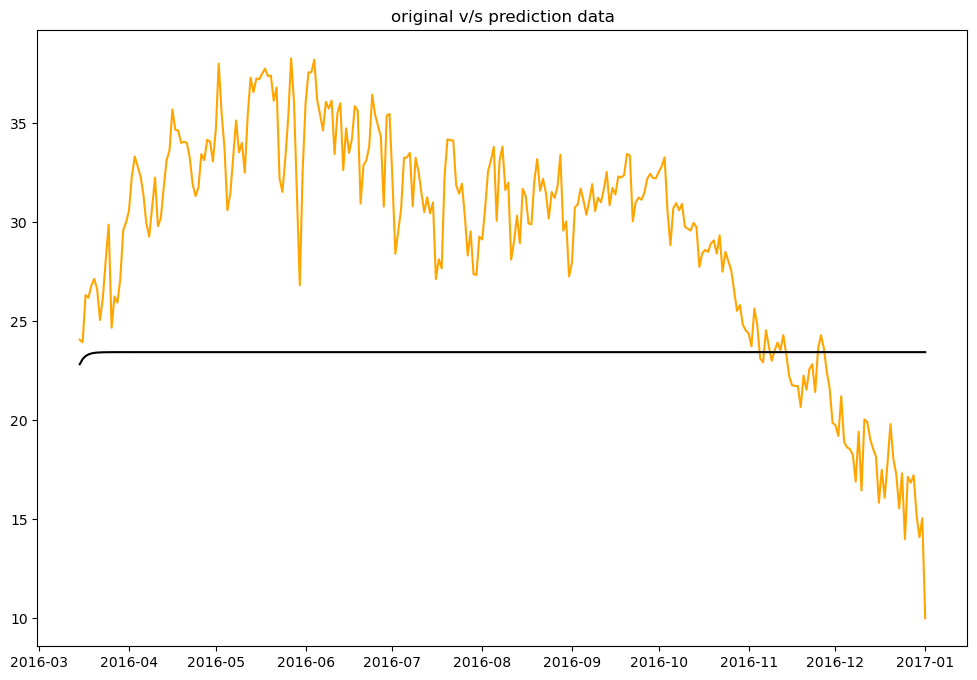

In [74]:
plt.figure(figsize = (12,8))
plt.plot(test.index,test['meantemp'],color='orange',label="original")
plt.plot(test.index,test['forecast'],color='k',label="original")
plt.title("original v/s prediction data")
plt.show()

ARIMA on difference values :

In [50]:
train1=df.iloc[0:1169]
test1=df.iloc[1169:]

In [75]:
mymodel1=ARIMA(train1['meandiff'],order = (1,1,1))

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [76]:
mymodel1=mymodel1.fit()

In [80]:
forecast1 = mymodel1.forecast(steps=len(test1))
print(forecast1.head())

2016-03-15    0.322914
2016-03-16   -0.040400
2016-03-17    0.019656
2016-03-18    0.009729
2016-03-19    0.011370
Freq: D, Name: predicted_mean, dtype: float64


In [81]:
test1['forecast_dif']=forecast1
test1.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_5372\4011570898.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1['forecast_dif']=forecast1


,meantemp,humidity,wind_speed,meanpressure,meandiff,forecast_dif
date,,,,,,
2016-03-15,24.066667,58.933333,8.646667,1014.866667,1.691667,0.322914
2016-03-16,23.937500,53.750000,10.881250,1012.812500,-0.129167,-0.040400
2016-03-17,26.312500,50.312500,6.843750,1010.437500,2.375000,0.019656
2016-03-18,26.187500,61.250000,6.712500,1009.812500,-0.125000,0.009729
2016-03-19,26.785714,61.857143,3.578571,1009.214286,0.598214,0.011370


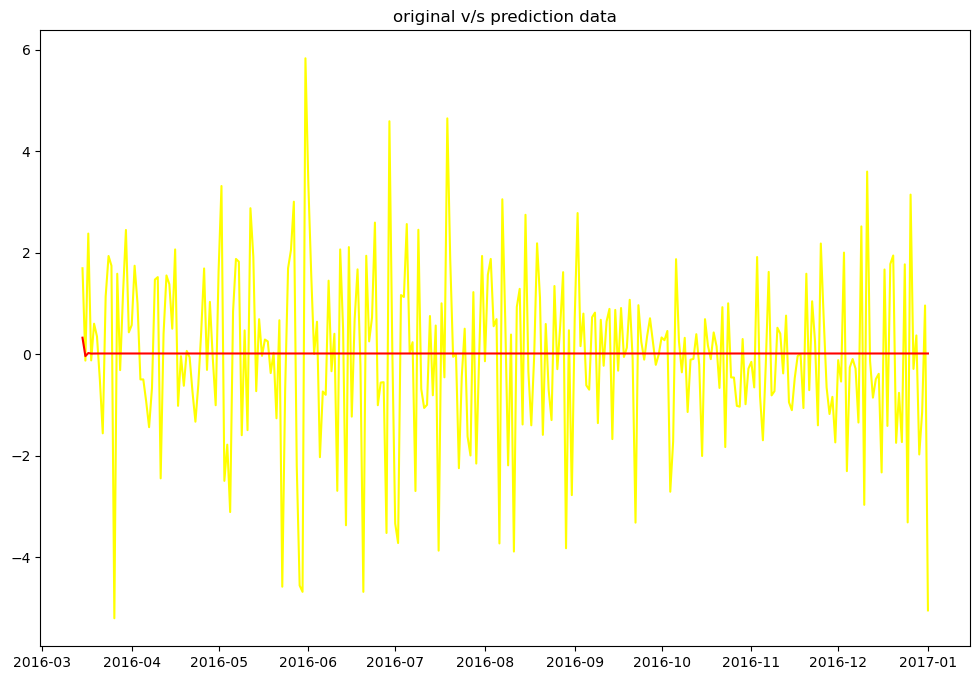

In [85]:
plt.figure(figsize = (12,8))
plt.plot(test1.index,test1['meandiff'],color='yellow',label="original")
plt.plot(test1.index,test1['forecast_dif'],color='red',label="original")
plt.title("original v/s prediction data")
plt.show()

* 15th march , original values =24.066667 , model says there is  -0.040438 changes on next day
* 24.066667 - 0.040438 = 24.02 (predicted ) ~ 23.9375000(oroginal)